In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import Imputer

In [2]:
solar=pd.read_csv('../deepsolar_tract.csv',encoding = "ISO-8859-1")
solar.head()
solar_fields=pd.read_csv('../deepsolar fields.csv')
solar_fields.head()

,Field,Description,Unit,Data Type,Formula,Possible Values,Observed Max,Observed Min,Theoretical Min,Theoretical Max,Relevant Feature,Mentioned in Supplemental Info,API documentation,API Field Name,API In Line With Collected Data
0,Unnamed: 0,Index,NaN,Numeric,NaN,NaN,72537.000,0,NaN,NaN,0,NaN,NaN,NaN,NaN
1,tile_count,total number of tiles in census tract,NaN,Numeric,NaN,NaN,4468.000,0,0.0,NaN,0,NaN,NaN,NaN,NaN
2,solar_system_count,Total number of solar systems in census tract,NaN,Numeric,NaN,NaN,1535.000,0,0.0,NaN,0,NaN,NaN,NaN,NaN
3,total_panel_area,NaN,NaN,Numeric,NaN,NaN,592031.075,0,0.0,NaN,0,NaN,NaN,NaN,NaN
4,fips,FIPS identifier for the census tract,NaN,String,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [3]:
#define relevant features and dependent variable
features=solar_fields.loc[(solar_fields['Mentioned in Supplemental Info']==1)]['Field'].tolist()
all_variables=features+['number_of_solar_system_per_household']

#all_variables=features+['number_of_solar_system_per_household']+['incentive_count_residential']+['incentive_residential_state_level']

solar2=solar[all_variables]

#Create binary version of number_of_solar_system_per_household for RF classifier

solar2['solar_flag']=solar2['number_of_solar_system_per_household'].apply(lambda x: int(x>0))
solar2=solar2.loc[np.isfinite(solar2['number_of_solar_system_per_household'])]


C:\Users\noahw\Anaconda3\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [4]:
processed_solar=solar2.transform(lambda x: x.fillna(x.median()))

In [5]:
regression_cols=['heating_fuel_coal_coke_rate','daily_solar_radiation','population_density','housing_unit_median_value'
                ,'relative_humidity','housing_unit_median_gross_rent','education_bachelor_rate','mortgage_with_rate'
                 ,'average_household_income','education_high_school_graduate_rate','travel_time_less_than_10_rate',
                'number_of_years_of_education','health_insurance_public_rate','transportation_car_alone_rate'
                 ,'travel_time_average','occupancy_owner_rate','heating_fuel_gas_rate','household_type_family_rate',
                 'avg_electricity_retail_rate','age_more_than_85_rate','voting_2016_gop_percentage',
                 'occupation_manufacturing_rate','occupation_construction_rate','frost_days','net_metering','education_college_rate']

In [6]:
model = sm.OLS(processed_solar['number_of_solar_system_per_household'], processed_solar[regression_cols]).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     number_of_solar_system_per_household   R-squared:                       0.225
Model:                                              OLS   Adj. R-squared:                  0.225
Method:                                   Least Squares   F-statistic:                     801.2
Date:                                  Tue, 19 Mar 2019   Prob (F-statistic):               0.00
Time:                                          16:13:36   Log-Likelihood:             1.3143e+05
No. Observations:                                 71766   AIC:                        -2.628e+05
Df Residuals:                                     71740   BIC:                        -2.626e+05
Df Model:                                            26                                         
Covariance Type:                              nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
heating_fuel_coal_coke_rate            -0.0037      0.003     -1.235      0.217      -0.010       0.002
daily_solar_radiation                   0.0062      0.000     14.684      0.000       0.005       0.007
population_density                  -4.043e-07   1.73e-08    -23.315      0.000   -4.38e-07    -3.7e-07
housing_unit_median_value           -4.847e-09   1.57e-09     -3.079      0.002   -7.93e-09   -1.76e-09
relative_humidity                      -0.0655      0.002    -29.252      0.000      -0.070      -0.061
housing_unit_median_gross_rent       9.621e-06   5.61e-07     17.150      0.000    8.52e-06    1.07e-05
education_bachelor_rate                -0.0050      0.004     -1.330      0.183      -0.012       0.002
mortgage_with_rate                      0.0135      0.001     10.753      0.000       0.011       0.016
average_household_income             1.181e-07   1.01e-08     11.660      0.000    9.82e-08    1.38e-07
education_high_school_graduate_rate     0.0228      0.003      8.872      0.000       0.018       0.028
travel_time_less_than_10_rate           0.0134      0.002      7.031      0.000       0.010       0.017
number_of_years_of_education           -0.0008      0.000     -3.152      0.002      -0.001      -0.000
health_insurance_public_rate           -0.0101      0.002     -5.822      0.000      -0.013      -0.007
transportation_car_alone_rate          -0.0314      0.002    -19.242      0.000      -0.035      -0.028
travel_time_average                    -0.0002   3.05e-05     -6.953      0.000      -0.000      -0.000
occupancy_owner_rate                    0.0056      0.001      4.729      0.000       0.003       0.008
heating_fuel_gas_rate                   0.0037      0.001      5.474      0.000       0.002       0.005
household_type_family_rate              0.0063      0.002      3.855      0.000       0.003       0.009
avg_electricity_retail_rate             0.0016   7.71e-05     20.688      0.000       0.001       0.002
age_more_than_85_rate                   0.2686      0.008     32.072      0.000       0.252       0.285
voting_2016_gop_percentage             -0.0078      0.001     -6.263      0.000      -0.010      -0.005
occupation_manufacturing_rate           0.0163      0.002      6.691      0.000       0.012       0.021
occupation_construction_rate            0.0079      0.004      1.955      0.051   -1.84e-05       0.016
frost_days                             -0.0001   5.03e-06    -24.244      0.000      -0.000      -0.000
net_metering                            0.0001   2.07e-05      6.834      0.0

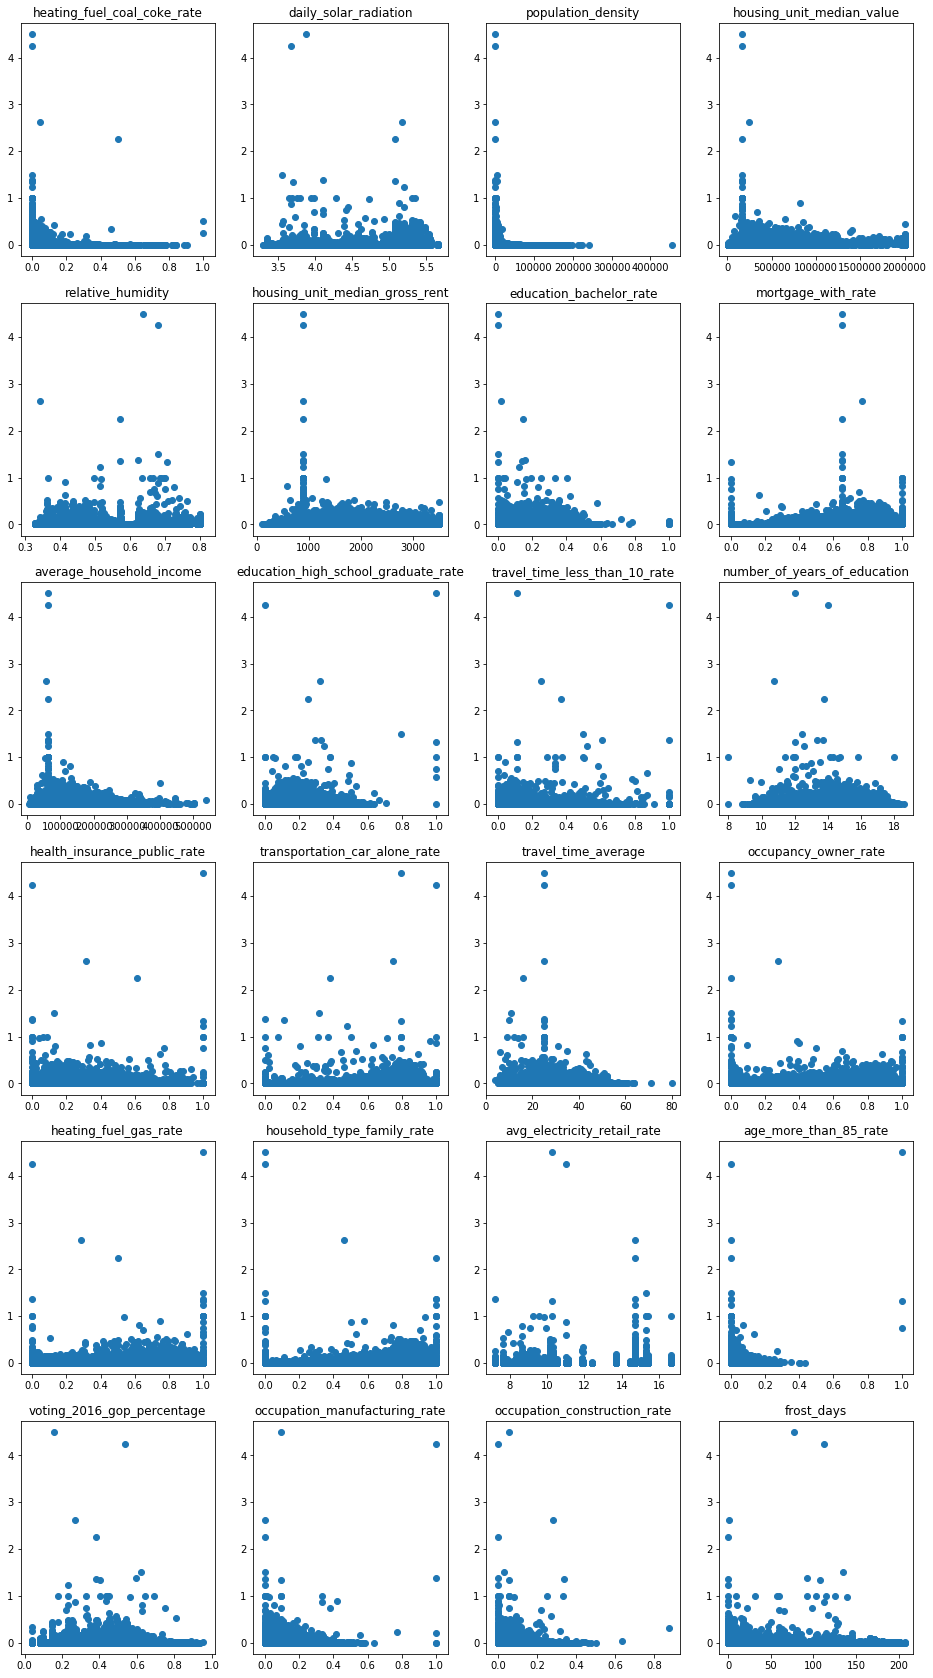

In [58]:
import math

num_rows=math.ceil(len(regression_cols)/4)
fig,ax=plt.subplots(int(num_rows),4,figsize=(16,30))
item_index=0
dependent_var=processed_solar['number_of_solar_system_per_household'].values
for i in range(0,int(num_rows)):
    for j in range(0,4):
        if item_index==len(regression_cols):
            break
        data=processed_solar[regression_cols[item_index]].replace(np.inf,np.nan).dropna().values
        ax[i,j].scatter(data,dependent_var)
        ax[i,j].set_title(regression_cols[item_index])
        item_index+=1
plt.show()

In [9]:
processed_solar[features+['number_of_solar_system_per_household']].corr().loc['occupancy_vacant_rate'].sort_values()

mortgage_with_rate                        -0.416789
occupancy_owner_rate                      -0.379790
housing_unit_median_gross_rent            -0.262564
average_household_income                  -0.247911
education_bachelor_rate                   -0.241693
age_35_44_rate                            -0.238563
heating_fuel_gas_rate                     -0.236013
employ_rate                               -0.229529
average_household_size                    -0.228580
race_asian_rate                           -0.213680
household_type_family_rate                -0.212020
number_of_years_of_education              -0.187732
education_master_rate                     -0.186177
voting_2016_dem_percentage                -0.185751
housing_unit_median_value                 -0.177239
occupation_administrative_rate            -0.162311
age_10_14_rate                            -0.158467
property_tax                              -0.158141
rebate                                    -0.156437
diversity   

In [ ]:
'age_more_than_85_rate','voting_2016_gop_percentage',
                 'occupation_manufacturing_rate','occupation_construction_rate','frost_days'

In [50]:
regression_cols_2=['heating_fuel_coal_coke_rate','daily_solar_radiation','population_density','housing_unit_median_value'
                ,'relative_humidity','housing_unit_median_gross_rent','education_bachelor_rate','mortgage_with_rate'
                 ,'average_household_income','education_high_school_graduate_rate','travel_time_less_than_10_rate',
                'number_of_years_of_education','health_insurance_public_rate','transportation_car_alone_rate'
                 ,'travel_time_average','occupancy_owner_rate','heating_fuel_gas_rate','household_type_family_rate',
                 'avg_electricity_retail_rate','age_more_than_85_rate','voting_2016_gop_percentage','occupation_manufacturing_rate'
                  ,'occupation_construction_rate','frost_days']

In [52]:
model2 = sm.OLS(processed_solar['number_of_solar_system_per_household'], processed_solar[features]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     number_of_solar_system_per_household   R-squared:                       0.219
Model:                                              OLS   Adj. R-squared:                  0.218
Method:                                   Least Squares   F-statistic:                     218.5
Date:                                  Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                                          23:22:39   Log-Likelihood:             1.3368e+05
No. Observations:                                 71766   AIC:                        -2.672e+05
Df Residuals:                                     71673   BIC:                        -2.663e+05
Df Model:                                            92                                         
Covariance Type:                              nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
average_household_income                 1.464e-07   1.16e-08     12.618      0.000    1.24e-07    1.69e-07
population_density                      -2.079e-07   2.02e-08    -10.314      0.000   -2.47e-07   -1.68e-07
education_less_than_high_school_rate     2.364e+04   5.69e+04      0.416      0.678   -8.78e+04    1.35e+05
education_high_school_graduate_rate      5266.6126   1.27e+04      0.415      0.678   -1.96e+04    3.01e+04
education_college_rate                  -3918.0906   9400.698     -0.417      0.677   -2.23e+04    1.45e+04
education_bachelor_rate                  -1.31e+04   3.15e+04     -0.416      0.677   -7.48e+04    4.86e+04
education_master_rate                   -2.229e+04   5.36e+04     -0.416      0.677   -1.27e+05    8.27e+04
education_professional_school_rate      -3.606e+04   8.67e+04     -0.416      0.677   -2.06e+05    1.34e+05
education_doctoral_rate                 -3.606e+04   8.67e+04     -0.416      0.677   -2.06e+05    1.34e+05
race_white_rate                         -6.041e+04   1.45e+05     -0.416      0.678   -3.45e+05    2.24e+05
race_black_africa_rate                  -6.041e+04   1.45e+05     -0.416      0.678   -3.45e+05    2.24e+05
race_indian_alaska_rate                 -6.041e+04   1.45e+05     -0.416      0.678   -3.45e+05    2.24e+05
race_asian_rate                         -6.041e+04   1.45e+05     -0.416      0.678   -3.45e+05    2.24e+05
race_islander_rate                      -6.041e+04   1.45e+05     -0.416      0.678   -3.45e+05    2.24e+05
race_other_rate                         -6.041e+04   1.45e+05     -0.416      0.678   -3.45e+05    2.24e+05
race_two_more_rate                      -6.041e+04   1.45e+05     -0.416      0.678   -3.45e+05    2.24e+05
employ_rate                                 0.0129      0.004      3.481      0.000       0.006       0.020
poverty_family_below_poverty_level_rate     0.0119      0.003      4.563      0.000       0.007       0.017
heating_fuel_gas_rate                      36.7642     82.648      0.445      0.656    -125.225     198.753
heating_fuel_electricity_rate              36.7606     82.648      0.445      0.656    -125.228     198.749
heating_fuel_fuel_oil_kerosene_rate        36.7652     82.648      0.445      0.656    -125.224     198.754
heating_fuel_coal_coke_rate                36.7400     82.648      0.445      0.657    -125.249     198.729
heating_fuel_solar_rate                    37.4201     82.648      0.453      0.651    -124.569     199.409
heating_fuel_other_rate                    36.7050     82.647      0.444     